# Proyek UTS PMDPM Gasal 2023/2024
Nama Anggota Kelompok:


*   Rizky Ardiansyah Ramadhan
*   Reinaldy Restu Aji
*   Marcello Aaron Kurniawan
*   Teofilos Mas Krisna Dewa



### Inisialisasi

- Import library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, RFE
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, KFold
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree

### Data Loading

- Proses data loading (boleh dengan file upload atau dengan mount drive jika menggunakan Google Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
properti = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset Property/Dataset UTS_Gasal 2425.csv")
properti.head(10000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,341,83,no,no,8,1960,4,4,1993,new,yes,2366,4016,229,yes,5,35371.3,Basic
9996,21514,5,no,yes,11,91373,1,1,1999,old,no,2584,5266,787,no,3,2153602.9,Basic
9997,1726,89,no,yes,5,73133,7,6,2009,old,yes,9311,1698,218,no,4,176425.9,Basic
9998,44403,29,yes,yes,12,34606,9,4,1990,old,yes,9061,1742,230,no,0,4448474.0,Basic


Dalam dataset ini terdiri dari beberapa kolom yaitu:
*   squaremeters: Luas properti dalam meter persegi.
*   numberofrooms: Jumlah kamar di properti.
*   hasyard: Menunjukkan apakah properti memiliki halaman (yard) atau tidak (yes/no).
*   haspool: Menunjukkan apakah properti memiliki kolam renang (pool) atau tidak (yes/no).
*   floors: Jumlah lantai di properti.
*   citycode: Kode kota tempat properti berada.
*   citypartrange: Rentang bagian kota.
*   numprevowners: Jumlah pemilik sebelumnya.
*   made: Tahun pembuatan properti.
*   isnewbuilt: Menunjukkan apakah properti baru dibangun atau tidak (new/old).
*   hasstormprotector: Menunjukkan apakah properti memiliki pelindung badai (storm protector) atau tidak (yes/no).
*   basement: Menunjukkan apakah properti memiliki basement atau tidak.
*   attic: Menunjukkan apakah properti memiliki loteng (attic) atau tidak.
*   garage: Menunjukkan apakah properti memiliki garasi atau tidak.
*   hasstorageroom: Menunjukkan apakah properti memiliki ruang penyimpanan (storage room) atau tidak (yes/no).
*   List item
*   hasguestroom: Menunjukkan apakah properti memiliki kamar tamu (guest room) atau tidak (yes/no).
*   price: Harga properti.
*   category: Kategori properti (misalnya, Luxury, Middle, dll.).


### Data Cleansing & Encoding

- Bagian berikut berisi proses pembersihan data.
- Periksa apakah terdapat missing value dan data duplikat,
- Ubah data kategorik string menjadi numerik.
- Jika jumlah kelas pada data latih tidak seimbang, kalian dapat menggunakan metode oversampling.
- Untuk **Klasifikasi**, pastikan **Harga menjadi target** dan **kolom Kategori dihapus**.

In [ ]:
print("#" * 50)
print("Informasi Umum tentang DataFrame:")
print("#" * 50)
properti.info()
print("\n")

print("#" * 50)
print("Missing Values per Column:")
print("#" * 50)
print(properti.isnull().sum())
print("\n")

print("#" * 50)
print("Jumlah Baris Duplikat:")
print("#" * 50)
print(properti.duplicated().sum())
print("\n")

if properti.duplicated().sum() > 0:
    print("#" * 50)
    print("Baris Duplikat:")
    print("#" * 50)
    print(properti[properti.duplicated()])
else:
    print("#" * 50)
    print("Tidak ada baris duplikat.")
    print("#" * 50)

##################################################
Informasi Umum tentang DataFrame:
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-nu

- Semua kolom memiliki nilai non-null, menunjukkan tidak ada data yang hilang.
- Setiap fitur dalam dataset dapat digunakan tanpa perlu penanganan nilai hilang.
- Terdapat 0 baris duplikat dalam dataset, memastikan bahwa setiap entri unik.




In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

properti.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,49870.13120,50.35840,50.27630,50225.48610,5.51010,5.52170,2005.48850,5033.10390,5028.01060,553.12120,4.99460,4993447.52575
std,28774.37535,28.81670,28.88917,29006.67580,2.87202,2.85667,9.30809,2876.72954,2894.33221,262.05017,3.17641,2877424.10995
min,89.00000,1.00000,1.00000,3.00000,1.00000,1.00000,1990.00000,0.00000,1.00000,100.00000,0.00000,10313.50000
25%,25098.50000,25.00000,25.00000,24693.75000,3.00000,3.00000,1997.00000,2559.75000,2512.00000,327.75000,2.00000,2516401.95000
50%,50105.50000,50.00000,50.00000,50693.00000,5.00000,5.00000,2005.50000,5092.50000,5045.00000,554.00000,5.00000,5016180.30000
75%,74609.75000,75.00000,76.00000,75683.25000,8.00000,8.00000,2014.00000,7511.25000,7540.50000,777.25000,8.00000,7469092.45000
max,99999.00000,100.00000,100.00000,99953.00000,10.00000,10.00000,2021.00000,10000.00000,10000.00000,1000.00000,10.00000,10006771.20000


In [ ]:
df_properti = properti.copy()
df_properti.head()
df_properti.columns

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom', 'price', 'category'],
      dtype='object')

**Cek jumlah kelas**

In [ ]:
columns_to_check = ['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
                    'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
                    'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
                    'hasguestroom', 'price', 'category']

for col in columns_to_check:
    print("#" * 50)
    print(f"Distribusi kelas untuk kolom: {col}")
    print("#" * 50)

    print(properti[col].value_counts())

    if properti[col].dtype in ['float64', 'int64']:
        print("\nStatistik Deskriptif:")
        print(properti[col].describe())

    print("\n")


##################################################
Distribusi kelas untuk kolom: squaremeters
##################################################
squaremeters
33749    3
68985    3
84311    3
52141    3
96526    3
        ..
96930    1
68572    1
98822    1
93762    1
44403    1
Name: count, Length: 9483, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean    49870.13120
std     28774.37535
min        89.00000
25%     25098.50000
50%     50105.50000
75%     74609.75000
max     99999.00000
Name: squaremeters, dtype: float64


##################################################
Distribusi kelas untuk kolom: numberofrooms
##################################################
numberofrooms
54    129
4     120
22    119
47    118
3     116
     ... 
6      85
34     84
31     84
40     82
9      75
Name: count, Length: 100, dtype: int64

Statistik Deskriptif:
count   10000.00000
mean       50.35840
std        28.81670
min         1.00000
25%        25.00000
50%        50.00000
75%      

Kolom category:

- Basic: 4344
- Luxury: 3065
- Middle: 2591

Ini menunjukkan sedikit ketidakseimbangan. Kategori Basic memiliki jumlah yang jauh lebih banyak dibandingkan Luxury dan Middle. Dalam kasus klasifikasi, ini mungkin bisa menyebabkan ketidakseimbangan performa model, terutama jika model lebih cenderung ke kelas yang lebih dominan.

In [ ]:
X = df_properti.drop(columns=['category', 'price'], axis=1)
y = df_properti['price']

X_trainReg, X_testReg, y_trainReg, y_testReg = train_test_split(X, y, test_size=0.30, random_state=77)
print(f"Shape of X_train: {X_trainReg.shape}")
print(f"Shape of X_test: {X_testReg.shape}")

Shape of X_train: (7000, 16)
Shape of X_test: (3000, 16)


In [ ]:
print(X.columns)

Index(['squaremeters', 'numberofrooms', 'hasyard', 'haspool', 'floors',
       'citycode', 'citypartrange', 'numprevowners', 'made', 'isnewbuilt',
       'hasstormprotector', 'basement', 'attic', 'garage', 'hasstorageroom',
       'hasguestroom'],
      dtype='object')


- Mengubah variabel kategori menjadi numerik.
- Membagi data menjadi set pelatihan dan pengujian.

In [ ]:
cat_cols=['hasyard', 'haspool', 'isnewbuilt',
          'hasstormprotector', 'hasstorageroom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

In [ ]:
X_trainReg_enc = transformer.fit_transform(X_trainReg)
X_testReg_enc = transformer.transform(X_testReg)

df_trainReg_enc = pd.DataFrame(X_trainReg_enc, columns=transformer.get_feature_names_out())
df_testReg_enc = pd.DataFrame(X_testReg_enc, columns=transformer.get_feature_names_out())

df_trainReg_enc.head(10)
df_testReg_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__numberofrooms,remainder__floors,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom
0,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,63.00000,55.00000,20424.00000,1.00000,1.00000,2004.00000,2001.00000,2817.00000,944.00000,9.00000
1,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,80.00000,12.00000,40356.00000,9.00000,4.00000,2021.00000,5685.00000,6810.00000,914.00000,1.00000
2,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,26.00000,39.00000,97335.00000,1.00000,5.00000,1992.00000,1891.00000,7697.00000,970.00000,4.00000
3,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,9.00000,45.00000,75550.00000,6.00000,2.00000,2000.00000,8360.00000,9493.00000,190.00000,5.00000
4,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,58.00000,73.00000,52386.00000,3.00000,8.00000,2007.00000,372.00000,8941.00000,438.00000,4.00000
5,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,...,94.00000,57.00000,65876.00000,7.00000,5.00000,2021.00000,6677.00000,2068.00000,185.00000,3.00000
6,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,...,83.00000,79.00000,74999.00000,2.00000,8.00000,2010.00000,2595.00000,7348.00000,850.00000,0.00000
7,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,...,65.00000,46.00000,49113.00000,2.00000,10.00000,1995.00000,5226.00000,5244.00000,682.00000,4.00000
8,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,...,27.00000,58.00000,25553.00000,7.00000,10.00000,1994.00000,8279.00000,7190.00000,183.00000,7.00000
9,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,...,3.00000,61.00000,72814.00000,6.00000,5.00000,2001.00000,4387.00000,1227.00000,775.00000,9.00000


In [ ]:
np.set_printoptions(formatter={'float': '{:.2f}'.format})

print(X_trainReg_enc)

[[1.00 0.00 1.00 ... 746.00 758.00 3.00]
 [1.00 0.00 1.00 ... 4130.00 975.00 10.00]
 [0.00 1.00 0.00 ... 1522.00 103.00 3.00]
 ...
 [1.00 0.00 0.00 ... 2347.00 292.00 9.00]
 [1.00 0.00 0.00 ... 4500.00 767.00 3.00]
 [1.00 0.00 0.00 ... 3734.00 196.00 10.00]]


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=77)

X_folds = []
y_folds = []

for train_index, test_index in kf.split(X_trainReg_enc):
    X_folds.append((X_trainReg_enc[train_index], X_trainReg_enc[test_index]))
    y_folds.append((y_trainReg.iloc[train_index], y_trainReg.iloc[test_index]))

**Ridge Regression **

In [ ]:
pipe_Ridge = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', Ridge())
])

param_grid_Ridge = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100],
    'feature_selection__k': np.arange(1, 20)
}

GSCV_RR = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5,
                       scoring='neg_mean_squared_error', error_score='raise')

GSCV_RR.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_RR.best_estimator_)
print("Ridge best parameters:", GSCV_RR.best_params_)

print("Koefisien/bobot:", GSCV_RR.best_estimator_.named_steps['reg'].coef_)
print("Intercept/bias:", GSCV_RR.best_estimator_.named_steps['reg'].intercept_)

Ridge_predict = GSCV_RR.predict(X_testReg_enc)

mse_Ridge = mean_squared_error(y_testReg, Ridge_predict)
mae_Ridge = mean_absolute_error(y_testReg, Ridge_predict)

print("Ridge Mean Squared Error (MSE):", mse_Ridge)
print("Ridge Mean Absolute Error (MAE):", mae_Ridge)
print("Ridge Root Mean Squared Error:", np.sqrt(mse_Ridge))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'Ridge Predicted Price': Ridge_predict
})

df_results['Price Difference (Ridge)'] = df_results['Ridge Predicted Price'] - df_results['Actual Price']

print(df_results.head())

Best Model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=19,
                             score_func=<function f_regression at 0x7dd7c4b743a0>)),
                ('reg', Ridge(alpha=0.01))])
Ridge best parameters: {'feature_selection__k': 19, 'reg__alpha': 0.01}
Koefisien/bobot: [-758.20 758.20 -737.76 737.76 38.58 -38.58 -33.02 33.02 -17.66 17.66
 2877891.20 -2.99 1567.96 -11.43 126.78 -6.39 -25.71 -13.28 39.79]
Intercept/bias: 4986975.165585715
Ridge Mean Squared Error (MSE): 3632947.934956798
Ridge Mean Absolute Error (MAE): 1482.7892392328977
Ridge Root Mean Squared Error: 1906.0293636134775
   Actual Price  Ridge Predicted Price  Price Difference (Ridge)
0 3217288.40000          3219633.82051                2345.42051
1 6491104.10000          6492382.39749                1278.29749
2 3312643.20000          3313893.09519                1249.89519
3 7955735.00000          7958016.79243                2281.79243
4 5

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
pipe_Ridge = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),
    ('reg', Ridge())
])

param_grid_Ridge = {
    'reg__alpha': [0.01, 0.1, 1, 10, 100],
    'feature_selection__percentile': np.arange(10, 100, 10)
}

GSCV_Ridge = GridSearchCV(pipe_Ridge, param_grid_Ridge, cv=5,
                          scoring='neg_mean_squared_error', error_score='raise')

GSCV_Ridge.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_Ridge.best_estimator_)
print("Ridge best parameters:", GSCV_Ridge.best_params_)

Ridge_predict = GSCV_Ridge.predict(X_testReg_enc)

mse_Ridge = mean_squared_error(y_testReg, Ridge_predict)
mae_Ridge = mean_absolute_error(y_testReg, Ridge_predict)

print("Ridge MSE:", mse_Ridge)
print("Ridge MAE:", mae_Ridge)
print("Ridge RMSE:", np.sqrt(mse_Ridge))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'Ridge Predicted Price': Ridge_predict
})

df_results['Price Difference (Ridge)'] = df_results['Ridge Predicted Price'] - df_results['Actual Price']

print(df_results.head())


Best Model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feature_selection',
                 SelectPercentile(percentile=90,
                                  score_func=<function f_regression at 0x7dd7c4b743a0>)),
                ('reg', Ridge(alpha=0.01))])
Ridge best parameters: {'feature_selection__percentile': 90, 'reg__alpha': 0.01}
Ridge MSE: 6182450.1400302
Ridge MAE: 1993.6465821362417
Ridge RMSE: 2486.453325528191
   Actual Price  Ridge Predicted Price  Price Difference (Ridge)
0 3217288.40000          3219390.43363                2102.03363
1 6491104.10000          6494554.01989                3449.91989
2 3312643.20000          3314555.13994                1911.93994
3 7955735.00000          7958183.26901                2448.26901
4 5105930.70000          5104567.79961               -1362.90039


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Support Vector Regressor**

In [ ]:
pipe_SVR = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', SVR())
])

param_grid_SVR = {
    'reg__C': [0.1, 1, 10],
    'reg__epsilon': [0.01, 0.1, 0.5],
    'feature_selection__k': np.arange(1, 20)
}

GSCV_SVR = GridSearchCV(pipe_SVR, param_grid_SVR, cv=5, scoring='neg_mean_squared_error')
GSCV_SVR.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_SVR.best_estimator_)
print("SVR best parameters:", GSCV_SVR.best_params_)

SVR_predict = GSCV_SVR.predict(X_testReg_enc)

mse_SVR = mean_squared_error(y_testReg, SVR_predict)
mae_SVR = mean_absolute_error(y_testReg, SVR_predict)

print("SVR MSE:", mse_SVR)
print("SVR MAE:", mae_SVR)
print("SVR RMSE:", np.sqrt(mse_SVR))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'SVR Predicted Price': SVR_predict
})

df_results['Price Difference (SVR)'] = df_results['SVR Predicted Price'] - df_results['Actual Price']

print(df_results.head())


Best Model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(k=1,
                             score_func=<function f_regression at 0x7dd7c4b743a0>)),
                ('reg', SVR(C=10, epsilon=0.5))])
SVR best parameters: {'feature_selection__k': 1, 'reg__C': 10, 'reg__epsilon': 0.5}
SVR MSE: 8166894730886.678
SVR MAE: 2464137.9266452785
SVR RMSE: 2857777.9358947184
   Actual Price  SVR Predicted Price  Price Difference (SVR)
0 3217288.40000        4956926.13747           1739637.73747
1 6491104.10000        4994643.34742          -1496460.75258
2 3312643.20000        4957644.92710           1645001.72710
3 7955735.00000        5001670.11057          -2954064.88943
4 5105930.70000        4978414.70046           -127515.99954


In [ ]:
pipe_SVR = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('feature_selection', SelectPercentile(score_func=f_regression)),
    ('reg', SVR())
])

param_grid_SVR = {
    'reg__C': [0.1, 1, 10],
    'reg__epsilon': [0.01, 0.1, 0.5],
    'feature_selection__percentile': np.arange(10, 100, 10)
}

GSCV_SVR = GridSearchCV(pipe_SVR, param_grid_SVR, cv=5, scoring='neg_mean_squared_error')
GSCV_SVR.fit(X_trainReg_enc, y_trainReg)

print("Best Model:", GSCV_SVR.best_estimator_)
print("SVR best parameters:", GSCV_SVR.best_params_)

SVR_predict = GSCV_SVR.predict(X_testReg_enc)

mse_SVR = mean_squared_error(y_testReg, SVR_predict)
mae_SVR = mean_absolute_error(y_testReg, SVR_predict)

print("SVR MSE:", mse_SVR)
print("SVR MAE:", mae_SVR)
print("SVR RMSE:", np.sqrt(mse_SVR))

df_results = pd.DataFrame({
    'Actual Price': y_testReg.reset_index(drop=True),
    'SVR Predicted Price': SVR_predict
})

df_results['Price Difference (SVR)'] = df_results['SVR Predicted Price'] - df_results['Actual Price']

print(df_results.head())


Best Model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feature_selection',
                 SelectPercentile(score_func=<function f_regression at 0x7dd7c4b743a0>)),
                ('reg', SVR(C=10, epsilon=0.01))])
SVR best parameters: {'feature_selection__percentile': 10, 'reg__C': 10, 'reg__epsilon': 0.01}
SVR MSE: 8226161446151.247
SVR MAE: 2475131.6892078714
SVR RMSE: 2868128.561649782
   Actual Price  SVR Predicted Price  Price Difference (SVR)
0 3217288.40000        4970388.94190           1753100.54190
1 6491104.10000        4983145.40314          -1507958.69686
2 3312643.20000        4971615.30599           1658972.10599
3 7955735.00000        4986205.04721          -2969529.95279
4 5105930.70000        4977219.35048           -128711.34952


In [ ]:
df_results = pd.DataFrame({'Actual Price': y_testReg.reset_index(drop=True)})
df_results['Ridge Prediction'] = Ridge_predict
df_results['SVR Prediction'] = SVR_predict

df_results['Ridge Price Difference'] = df_results['Actual Price'] - df_results['Ridge Prediction']
df_results['SVR Price Difference'] = df_results['Actual Price'] - df_results['SVR Prediction']

print(df_results.head())

   Actual Price  Ridge Prediction  SVR Prediction  Ridge Price Difference  \
0 3217288.40000     3219390.43363   4970388.94190             -2102.03363   
1 6491104.10000     6494554.01989   4983145.40314             -3449.91989   
2 3312643.20000     3314555.13994   4971615.30599             -1911.93994   
3 7955735.00000     7958183.26901   4986205.04721             -2448.26901   
4 5105930.70000     5104567.79961   4977219.35048              1362.90039   

   SVR Price Difference  
0        -1753100.54190  
1         1507958.69686  
2        -1658972.10599  
3         2969529.95279  
4          128711.34952  


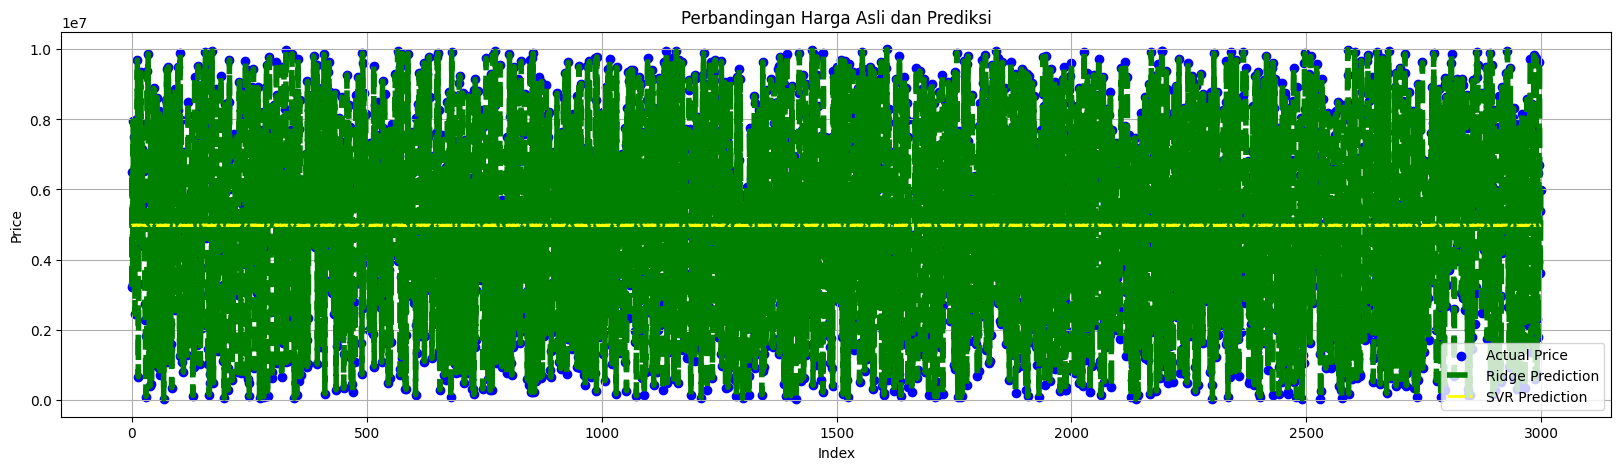

In [ ]:
plt.figure(figsize=(20, 5))
data_len = range(len(y_testReg))

plt.scatter(data_len, df_results['Actual Price'], label="Actual Price", color="blue")
plt.plot(data_len, df_results['Ridge Prediction'], label="Ridge Prediction", color="green", linewidth=4, linestyle="dashed")
plt.plot(data_len, df_results['SVR Prediction'], label="SVR Prediction", color="yellow", linewidth=2, linestyle="-.")

plt.title("Perbandingan Harga Asli dan Prediksi")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### 1. **Mean Squared Error (MSE)**
   - **Ridge Regression (Pipeline 1):** 3,632,947
   - **Ridge Regression (Pipeline 2):** 6,182,450
   - **SVR (Pipeline 1):** 8,166,894,730,886
   - **SVR (Pipeline 2):** 8,226,161,446,151
   
   **Penjelasan:**
   MSE mengukur seberapa jauh rata-rata prediksi dari harga aktual. Nilai yang lebih kecil menunjukkan model yang lebih akurat. **Ridge Regression (Pipeline 1)** memiliki MSE terendah (3,632,947), menunjukkan bahwa model ini menghasilkan prediksi yang paling akurat di antara semua model. Sebaliknya, **SVR** memiliki MSE yang sangat besar (lebih dari 8 triliun), menunjukkan performa yang sangat buruk.

### 2. **Mean Absolute Error (MAE)**
   - **Ridge Regression (Pipeline 1):** 1,482.79
   - **Ridge Regression (Pipeline 2):** 1,993.65
   - **SVR (Pipeline 1):** 2,464,137.93
   - **SVR (Pipeline 2):** 2,475,131.69
   
   **Penjelasan:**
   MAE mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. Lagi-lagi, **Ridge Regression (Pipeline 1)** memiliki MAE terendah (1,482.79), menunjukkan prediksi yang lebih dekat ke harga aktual. SVR menunjukkan performa yang jauh lebih buruk dengan MAE lebih dari 2 juta, menunjukkan prediksi yang sangat melenceng dari harga sebenarnya.

### 3. **Root Mean Squared Error (RMSE)**
   - **Ridge Regression (Pipeline 1):** 1,906.03
   - **Ridge Regression (Pipeline 2):** 2,486.45
   - **SVR (Pipeline 1):** 2,857,777.94
   - **SVR (Pipeline 2):** 2,868,128.56
   
   **Penjelasan:**
   RMSE adalah ukuran yang lebih sensitif terhadap kesalahan besar karena memperhitungkan kuadrat dari kesalahan. **Ridge Regression (Pipeline 1)** memiliki nilai RMSE terendah (1,906.03), menegaskan kembali bahwa model ini lebih baik dalam memprediksi harga dibandingkan SVR yang memiliki RMSE lebih dari 2 juta.

### 4. **Perbandingan Prediksi Harga**
   - **Ridge Regression (Pipeline 1):**
     - Harga Aktual: 3,217,288.4, Prediksi: 3,219,390.43 (Selisih: 2,102.03)
     - Harga Aktual: 6,491,104.1, Prediksi: 6,494,554.02 (Selisih: 3,449.92)
   - **SVR (Pipeline 1):**
     - Harga Aktual: 3,217,288.4, Prediksi: 4,970,388.94 (Selisih: 1,753,100.54)
     - Harga Aktual: 6,491,104.1, Prediksi: 4,983,145.40 (Selisih: -1,507,958.70)
     
   **Penjelasan:**
   Dari tabel prediksi harga, dapat dilihat bahwa **Ridge Regression** menghasilkan prediksi yang sangat dekat dengan harga aktual, dengan selisih prediksi berkisar antara 2,102 hingga 3,449. Sebaliknya, **SVR** menunjukkan selisih yang sangat besar, mencapai lebih dari 1,7 juta hingga 2,9 juta, menunjukkan model ini sangat tidak akurat dalam memprediksi harga.

### 5. **Kesimpulan**
   **Ridge Regression (Pipeline 1)** jelas lebih unggul dalam hal:
   - **Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE)** yang lebih rendah.
   - **Prediksi harga** yang lebih akurat dan mendekati nilai aktual.
   
   **Support Vector Regressor (SVR)** di semua pipeline menunjukkan performa yang buruk dengan kesalahan yang sangat besar, sehingga tidak cocok untuk prediksi harga dalam dataset ini.

### Rekomendasi:
Model terbaik untuk regresi berdasarkan hasil evaluasi ini adalah **Ridge Regression (Pipeline 1)** karena memberikan prediksi yang paling akurat dan memiliki error paling kecil di antara model lainnya.